# Introduction to ML Project : Credit Card Users Churn Prediction

### Problem statement

## Description

### Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

### Objective

Customers’ leaving credit card services would lead the bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and the reason for same – so that the bank could improve upon those areas.

You as a Data Scientist at Thera Bank need to explore the data provided, identify patterns, and come up with a classification model to identify customers likely to churn, and provide actionable insights and recommendations that will help the bank improve its services so that customers do not renounce their credit cards.

### Data Description

* **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
* **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* **Customer_Age:** Age in Years
* **Gender:** The gender of the account holder
* **Dependent_count:** Number of dependents
* **Education_Level:** Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College (refers to a college student), Post-Graduate, Doctorate.
* **Marital_Status:** Marital Status of the account holder
* **Income_Category:** Annual Income Category of the account holder
* **Card_Category:** Type of Card
* **Months_on_book:** Period of relationship with the bank
* **Total_Relationship_Count:** Total no. of products held by the customer
* **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
* **Contacts_Count_12_mon:** No. of Contacts between the customer and bank in the last 12 months
* **Credit_Limit:** Credit Limit on the Credit Card
* **Total_Revolving_Bal:** The balance that carries over from one month to the next is the revolving balance
* **Avg_Open_To_Buy:** Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** Ratio of the total transaction count in 4th quarter and the total transaction count in the 1st quarter
* **Total_Amt_Chng_Q4_Q1:** Ratio of the total transaction amount in 4th quarter and the total transaction amount in the 1st quarter
* **Avg_Utilization_Ratio:** Represents how much of the available credit the customer spent











In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Library used for missing value imputation
from sklearn.impute import SimpleImputer

# Library to help with model building

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Library to help with different metric scores, and splitting the data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
# Library used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Library used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Library used for creating pipelines and Transformations
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#library for upsampling the training data
from imblearn.over_sampling import SMOTE

#library for downsampling the training data
from imblearn.under_sampling import RandomUnderSampler

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

#To display the maximum number of columns in a dataframe
pd.set_option("display.max_columns", None)

In [2]:
data=pd.read_csv("C:\\Users\\punith yc\\Downloads\\BankChurners.csv")

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [4]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [5]:
data.shape

(10127, 21)

#### Observation :
There are 10127 rows and 21 columns in data

In [6]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

#### Observation :
There are 1519 null values in education_level and 749 null values in marital status 

In [7]:
data.duplicated().sum()

0

#### Observation :
As there are no duplicate values in the data across all the columns, so its not required to handle the duplicate values in the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Observation :
There are 6 object columns, 9 integer column and 5 float and some of the columns have null values and there are no duplicates in the data which means all the values are unique

In [9]:
data.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

#### Observation :
1. The min customer age is 26 and and the median customer age is 46 and the max age is 73
2. The min credit limit is 1438 and the max credit limit is 3415
3. 

In [10]:
data['CLIENTNUM'].nunique()

10127

#### Observation :
There are 10127 unique customers in the data

### Univariate Analysis

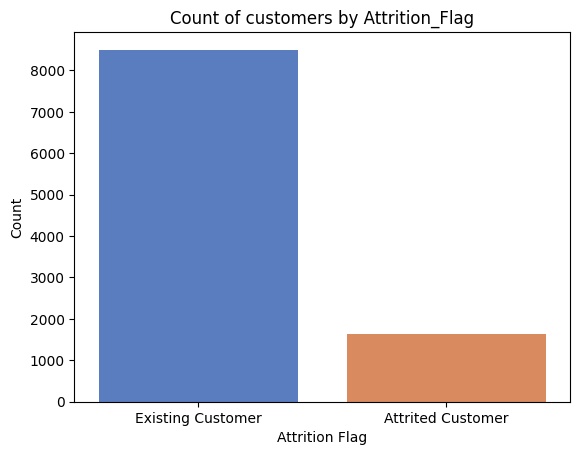

In [11]:
sns.countplot(data,x='Attrition_Flag',palette='muted')
plt.title("Count of customers by Attrition_Flag")
plt.ylabel("Count")
plt.xlabel("Attrition Flag")
plt.show()


#### Observation :
existing customers are more than 8000 and the attrited customers are nearly and the data looks like imbalanced data

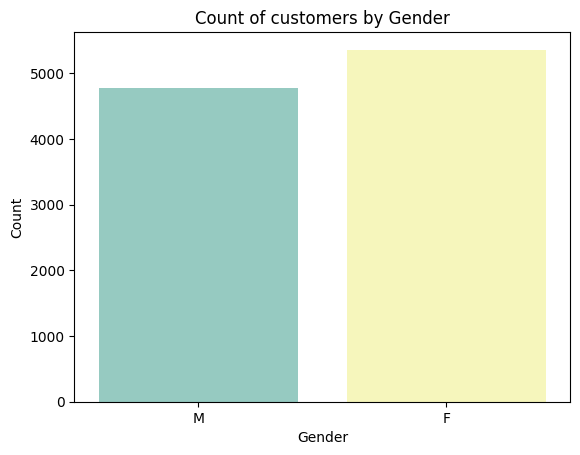

In [12]:
sns.countplot(data,x='Gender',palette='Set3')
plt.title("Count of customers by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()

#### Observation :
There are nearly 4800 male customers and more than 5000 female customers

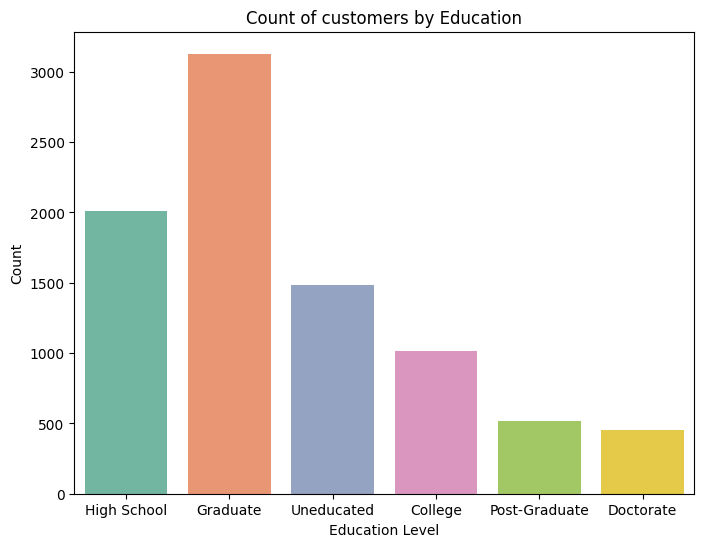

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data,x='Education_Level',palette='Set2')
plt.title("Count of customers by Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

#### Observation :
There are more number of customers who is having graduate degree follwed by high school and uneduacted and the least customers are from doctorate followed by post graduate and college

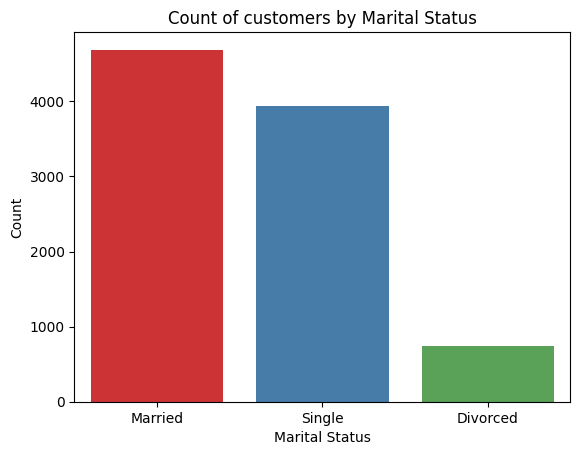

In [14]:
sns.countplot(data,x='Marital_Status',palette='Set1')
plt.title("Count of customers by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

#### Observation :
There are more than 4500 married customers followed by nearly 4000 customers who are unmarried and 1000 customers who had divorced

#### Observation :
most of the customers earning less than $45k and followed by 40-60k and the least customers are from 120k+ 

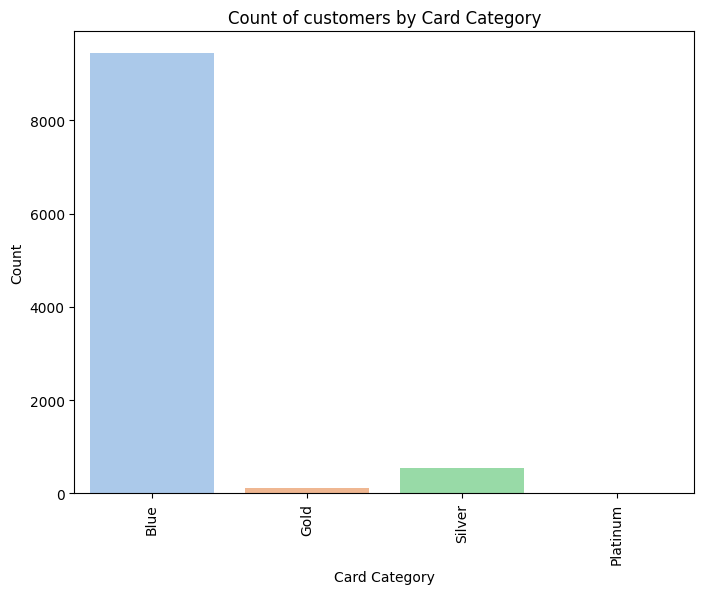

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data,x='Card_Category',palette='pastel')
plt.title("Count of customers by Card Category")
plt.xlabel("Card Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#### Observation :
90% of the customers are using blue card category followed by silver and the least card is category used by customers is platinum

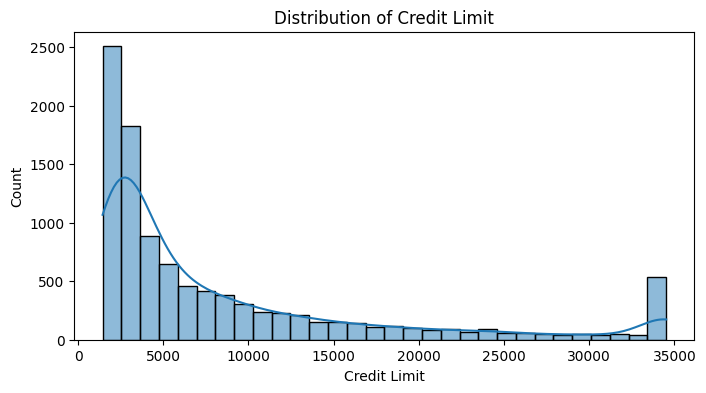

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Credit_Limit"], bins=30, kde=True,palette='bright')
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Count")
plt.show()

#### Observation :
The distribution looks like rightly skewed which means some of the customers is having high credit limit and most of the customers having credit limit in between 2000 to 5000

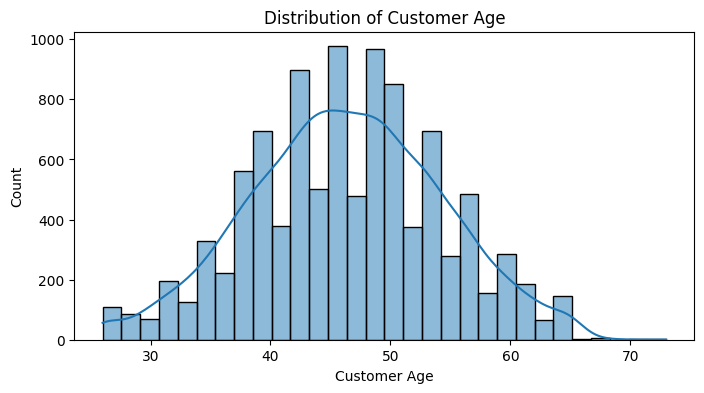

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Customer_Age"], bins=30, kde=True,palette="dark")
plt.title("Distribution of Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.show()

#### Observation :
The bistribution of the customer looks like nearly normal and the 50% of the customers are in the range of 40 to 60 years of age

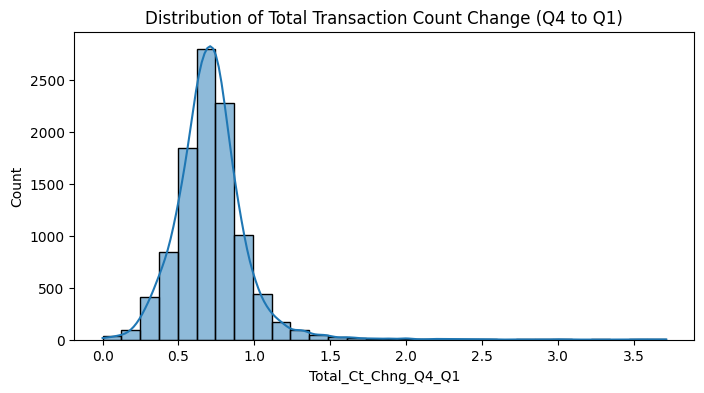

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Total_Ct_Chng_Q4_Q1"], bins=30, kde=True,palette="Blues")
plt.title("Distribution of Total Transaction Count Change (Q4 to Q1)")
plt.xlabel("Total_Ct_Chng_Q4_Q1")
plt.ylabel("Count")
plt.show()

#### Observation :
The distribution is right skewed which suggests that some of the customers are having high total transaction count change and most of the customers are having in between 0.5 to 1.0

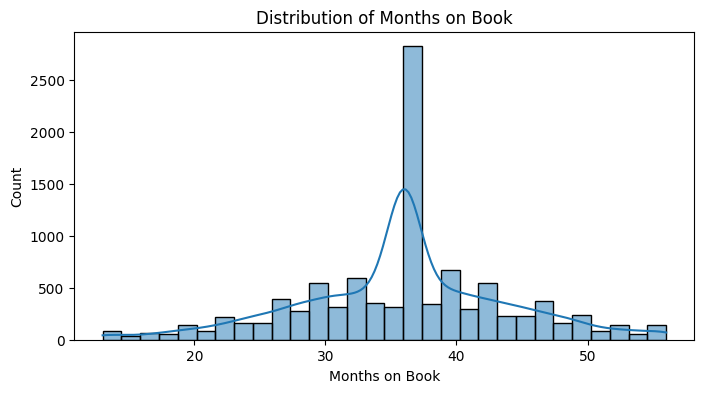

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Months_on_book"], bins=30, kde=True)
plt.title("Distribution of Months on Book")
plt.xlabel("Months on Book")
plt.ylabel("Count")
plt.show()

#### Observation :
The garph of distribution of months on book looks like normal and most of the customers having nearly 35 months on book

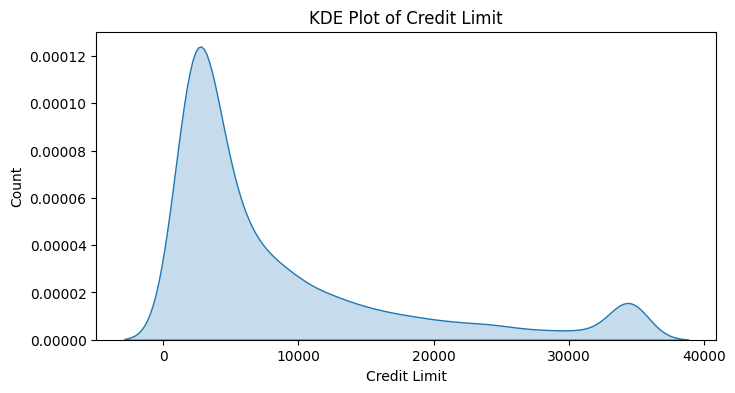

In [20]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data["Credit_Limit"], fill=True)
plt.title("KDE Plot of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Count")
plt.show()

#### Observation :
The graph looks like bimodal distribution and right skewed most of the customers having credit limit in betweeen 2000 to 10000

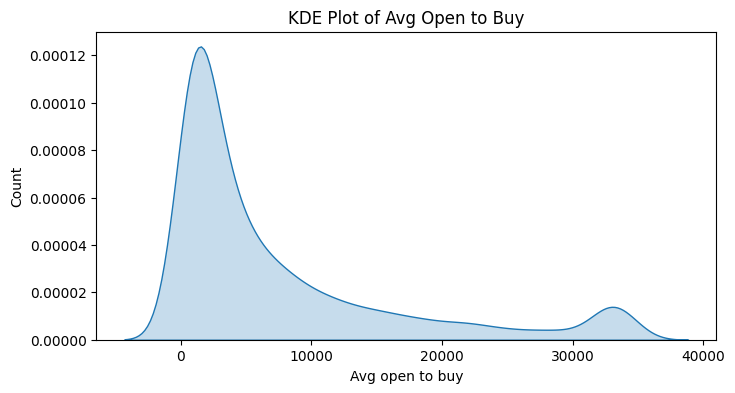

In [21]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data["Avg_Open_To_Buy"], fill=True)
plt.title("KDE Plot of Avg Open to Buy")
plt.xlabel("Avg open to buy")
plt.ylabel("Count")
plt.show()

#### Observation :
The distribution looks like bimodal and the right skewed distribution and the some of the customers having high avg open to buy and most of the customers having in between 0 to 5000

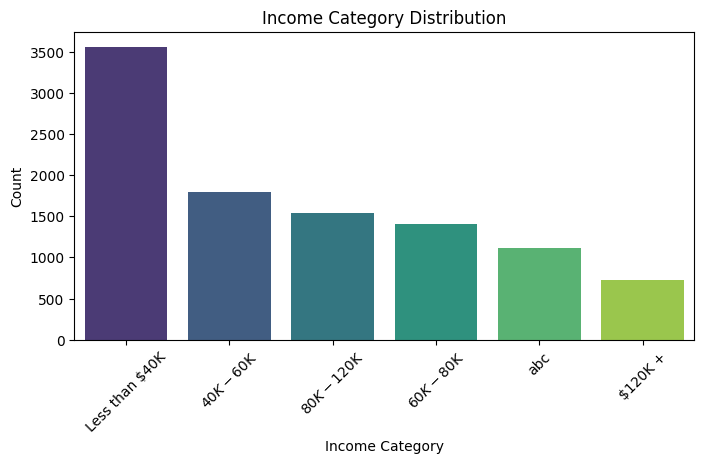

In [22]:
plt.figure(figsize=(8, 4))
sns.barplot(x=data["Income_Category"].value_counts().index, y=data["Income_Category"].value_counts().values,palette="viridis")
plt.title("Income Category Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Observation :
most of the customers earning less than $45k and followed by 40-60k and the least customers are from 120k+

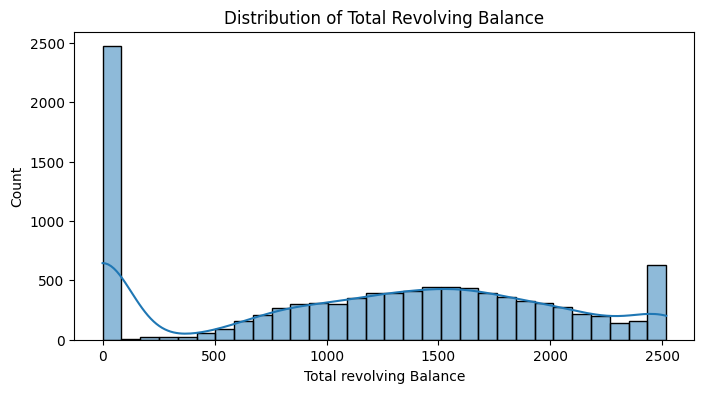

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Total_Revolving_Bal"], bins=30, kde=True)
plt.title("Distribution of Total Revolving Balance")
plt.xlabel("Total revolving Balance")
plt.ylabel("Count")
plt.show()

#### Observation :
The distribution looks like negatively skewed which means some of the customers are having negative total revolving balance

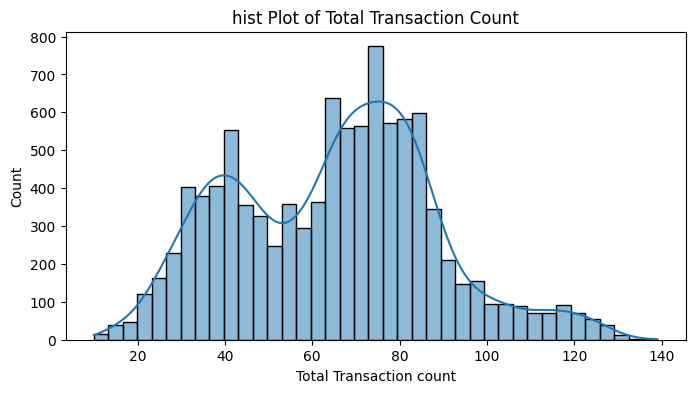

In [24]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Total_Trans_Ct"],kde=True,palette="viridis")
plt.title("hist Plot of Total Transaction Count")
plt.xlabel("Total Transaction count")
plt.ylabel("Count")
plt.show()

#### Observation :
The total transaction count distribution shows that a bimodal and slightly right skewed which suggest that some customers are having high transaction counts and the most of the customers are having nearly 80 transaction counts

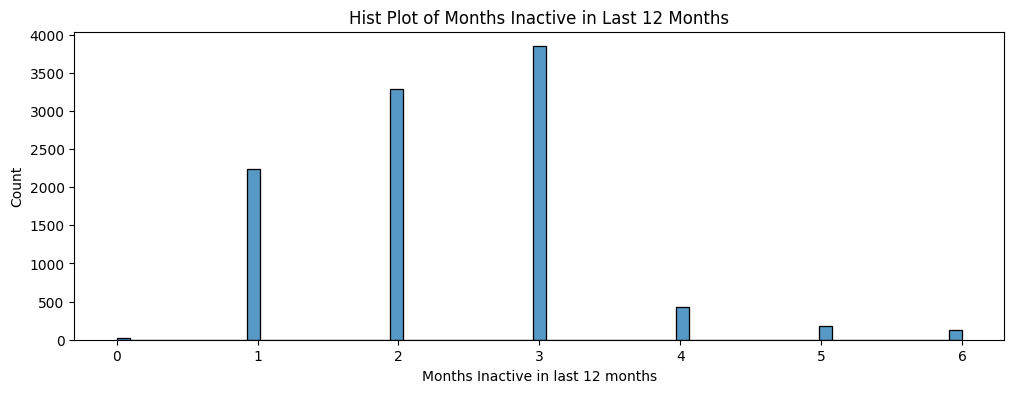

In [25]:
plt.figure(figsize=(12, 4))
sns.histplot(data["Months_Inactive_12_mon"],palette="coolwarm")
plt.title("Hist Plot of Months Inactive in Last 12 Months")
plt.xlabel("Months Inactive in last 12 months")
plt.ylabel("Count")
plt.show()


#### Observation :
Most of the customers are inactive from the past 3 months followed by 2 months and the less customers are in active from the 0 months followed by 6 and 5 months

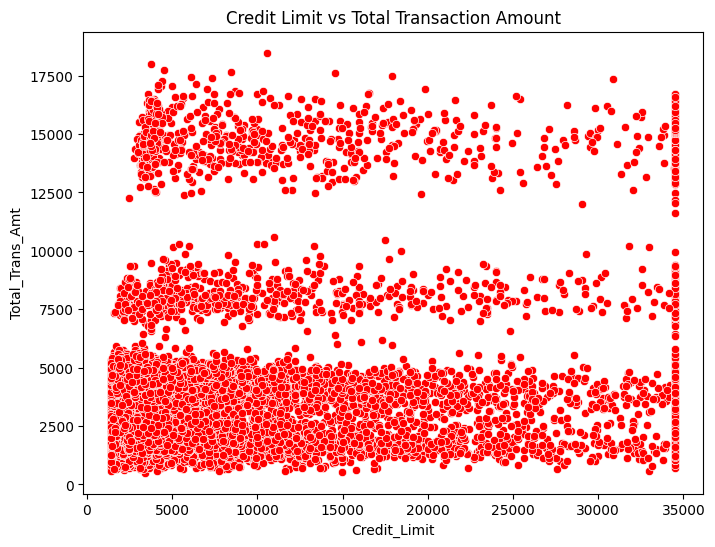

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["Credit_Limit"], y=data["Total_Trans_Amt"],color="Red")
plt.title("Credit Limit vs Total Transaction Amount")
plt.show()

#### Observation :
The scatterplot shows that there is no association between the credit limit and total transaction amount

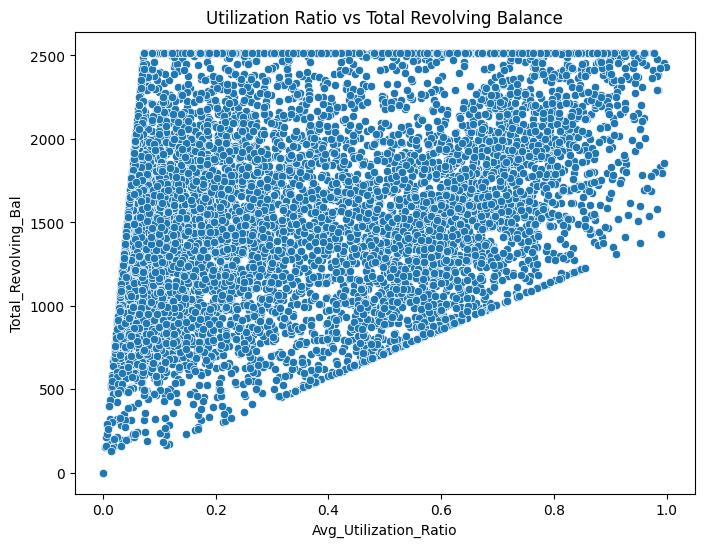

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["Avg_Utilization_Ratio"], y=data["Total_Revolving_Bal"])
plt.title("Utilization Ratio vs Total Revolving Balance")
plt.show()


#### Observation :
The scatter plot shows that there is no relationship between the utilization ratio and total revolving balance

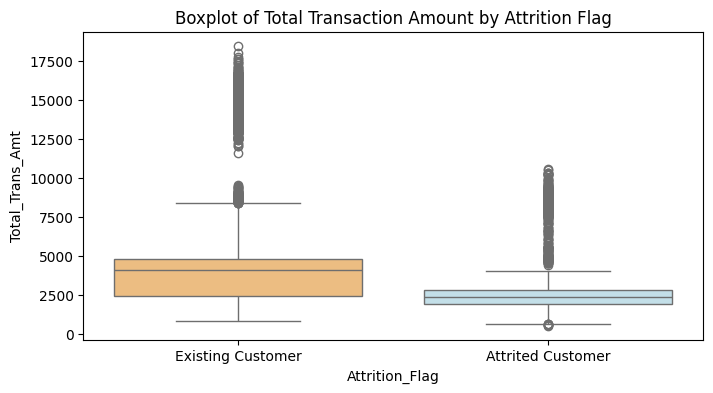

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data["Attrition_Flag"], y=data["Total_Trans_Amt"],palette="RdYlBu")
plt.title("Boxplot of Total Transaction Amount by Attrition Flag")
plt.show()


#### Observation :
1. The 25% of the existing customers are having 2500 of transaction amount with the meadian of nearly 4700 and the 75% customers with 5000 and the max amount is nearrly 8000 and also there are some outliers as well
2. The 25% of the attrited customers are havingf nearly 2000 transaction amount with a median of 2500 and 75% of customers are having nearly 3000 and max amount is 4000 with some outliers

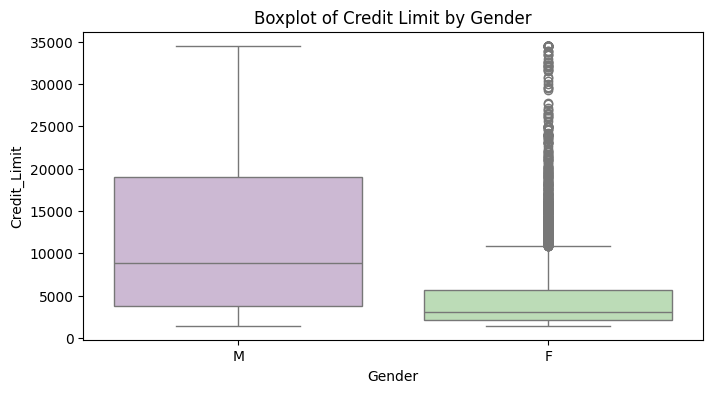

In [29]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data["Gender"], y=data["Credit_Limit"],palette="PRGn")
plt.title("Boxplot of Credit Limit by Gender")
plt.show()


#### Observation :
1. The male customers having the high median credit limit compared to the female customers and 25% of the male customers having credit limit compared to the 25% female customers 

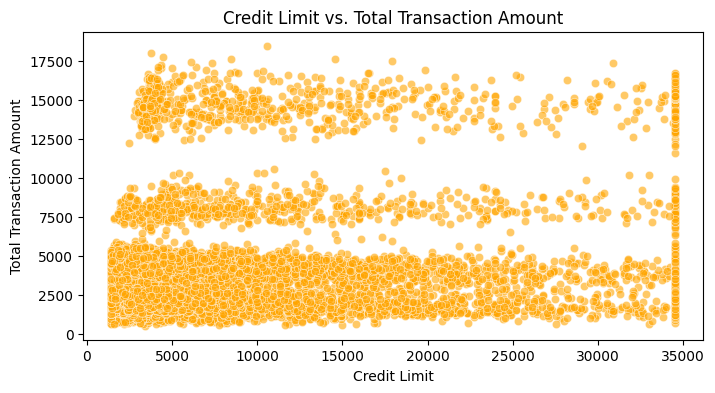

In [30]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data["Credit_Limit"], y=data["Total_Trans_Amt"], alpha=0.6,color="orange")
plt.title("Credit Limit vs. Total Transaction Amount")
plt.xlabel("Credit Limit")
plt.ylabel("Total Transaction Amount")
plt.show()

#### Observation :
There is no relationship between the credit limit and the total transactional amount

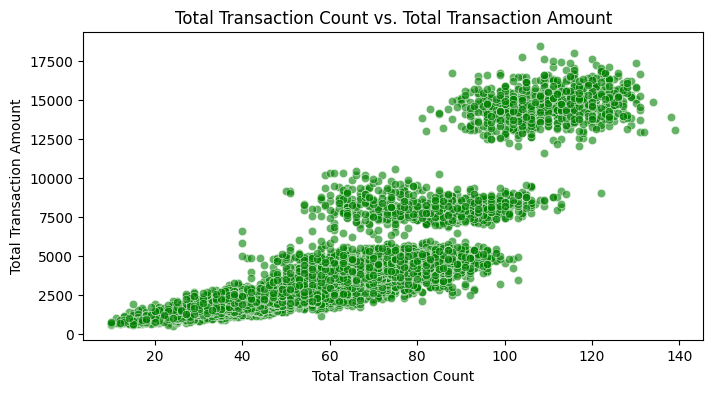

In [31]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data["Total_Trans_Ct"], y=data["Total_Trans_Amt"], alpha=0.6, color="green")
plt.title("Total Transaction Count vs. Total Transaction Amount")
plt.xlabel("Total Transaction Count")
plt.ylabel("Total Transaction Amount")
plt.show()


#### Observation :
The scatterplot suggests that there is no relationship between the total transaction count and the total transaction amount

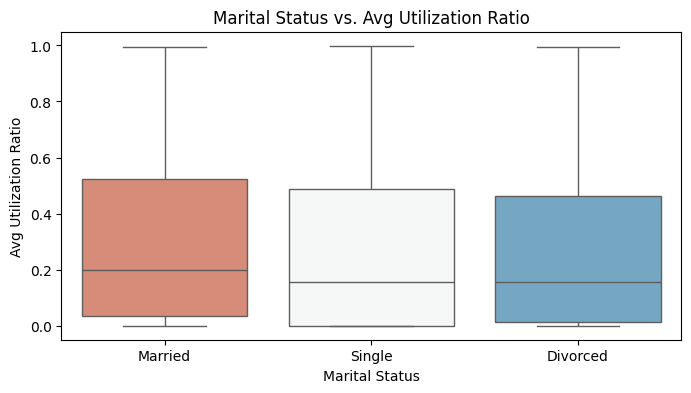

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data["Marital_Status"], y=data["Avg_Utilization_Ratio"],palette="RdBu")
plt.title("Marital Status vs. Avg Utilization Ratio")
plt.xlabel("Marital Status")
plt.ylabel("Avg Utilization Ratio")
plt.show()


#### Observation :
The married customers having the high medain avg utilization ratio compared to single and divorced customers with no outliers

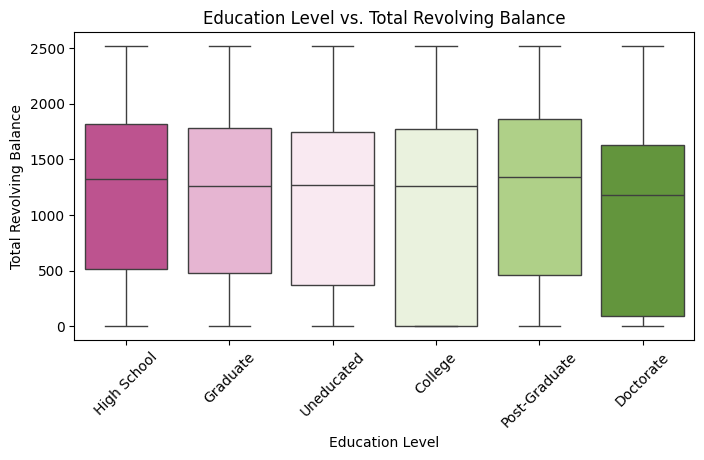

In [33]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data["Education_Level"], y=data["Total_Revolving_Bal"],palette="PiYG")
plt.title("Education Level vs. Total Revolving Balance")
plt.xlabel("Education Level")
plt.ylabel("Total Revolving Balance")
plt.xticks(rotation=45)
plt.show()

#### Observation :
The post graduate customers having the high median total revolving balance followed by high school and then graduate and the customers having the low median is doctorate

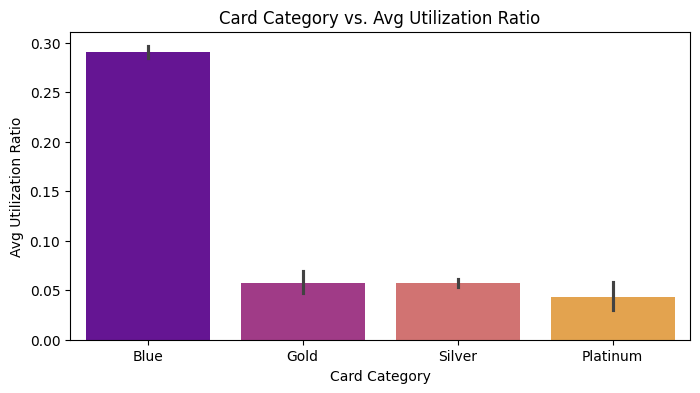

In [34]:
plt.figure(figsize=(8, 4))
sns.barplot(x=data["Card_Category"], y=data["Avg_Utilization_Ratio"],palette="plasma")
plt.title("Card Category vs. Avg Utilization Ratio")
plt.xlabel("Card Category")
plt.ylabel("Avg Utilization Ratio")
plt.show()


#### Observation :
The blue category customers having the high avg utilization ratio follwed by g0old and silver and the least avg utilization ratio is for platinum category customers

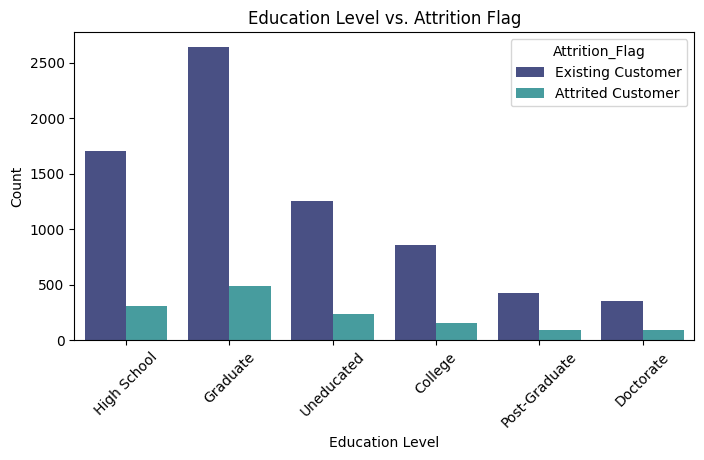

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(x=data["Education_Level"], hue=data["Attrition_Flag"],palette="mako")
plt.title("Education Level vs. Attrition Flag")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### Observation :
most of the customers are churned are from graduates followed by high school and uneduacted and the least customers churned are from doctorate followed by post graduate and collge

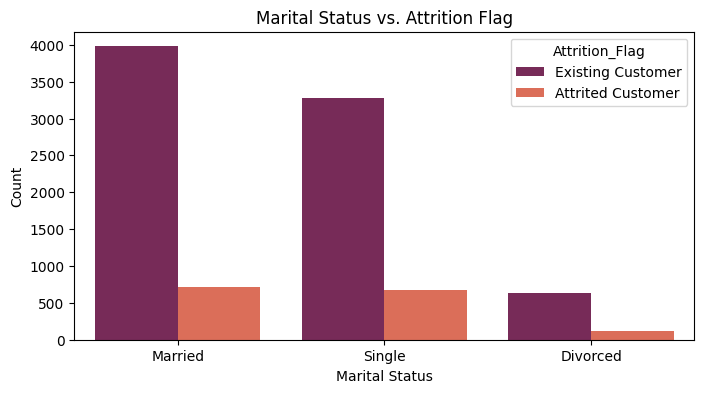

In [36]:
plt.figure(figsize=(8, 4))
sns.countplot(x=data["Marital_Status"], hue=data["Attrition_Flag"],palette="rocket")
plt.title("Marital Status vs. Attrition Flag")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


#### Observation :
Most of the existing customers are married follwoed by single and divorced and most of the customers who got churned are from married followed by single and divorced

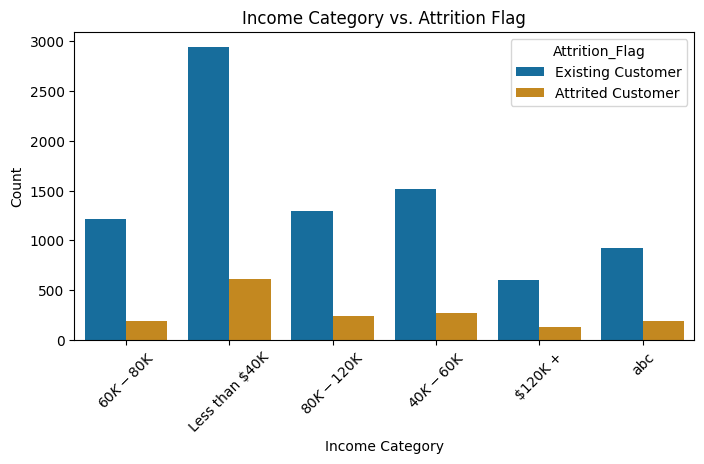

In [37]:
plt.figure(figsize=(8, 4))
sns.countplot(x=data["Income_Category"], hue=data["Attrition_Flag"],palette="colorblind")
plt.title("Income Category vs. Attrition Flag")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Observation :
most of the churned customers are from the category who are earning less than $45k followed by 40k to 60k and the least customers churnedd are from $120k+
most of the existing customers are from less than $40k followed by 40k to 60k 

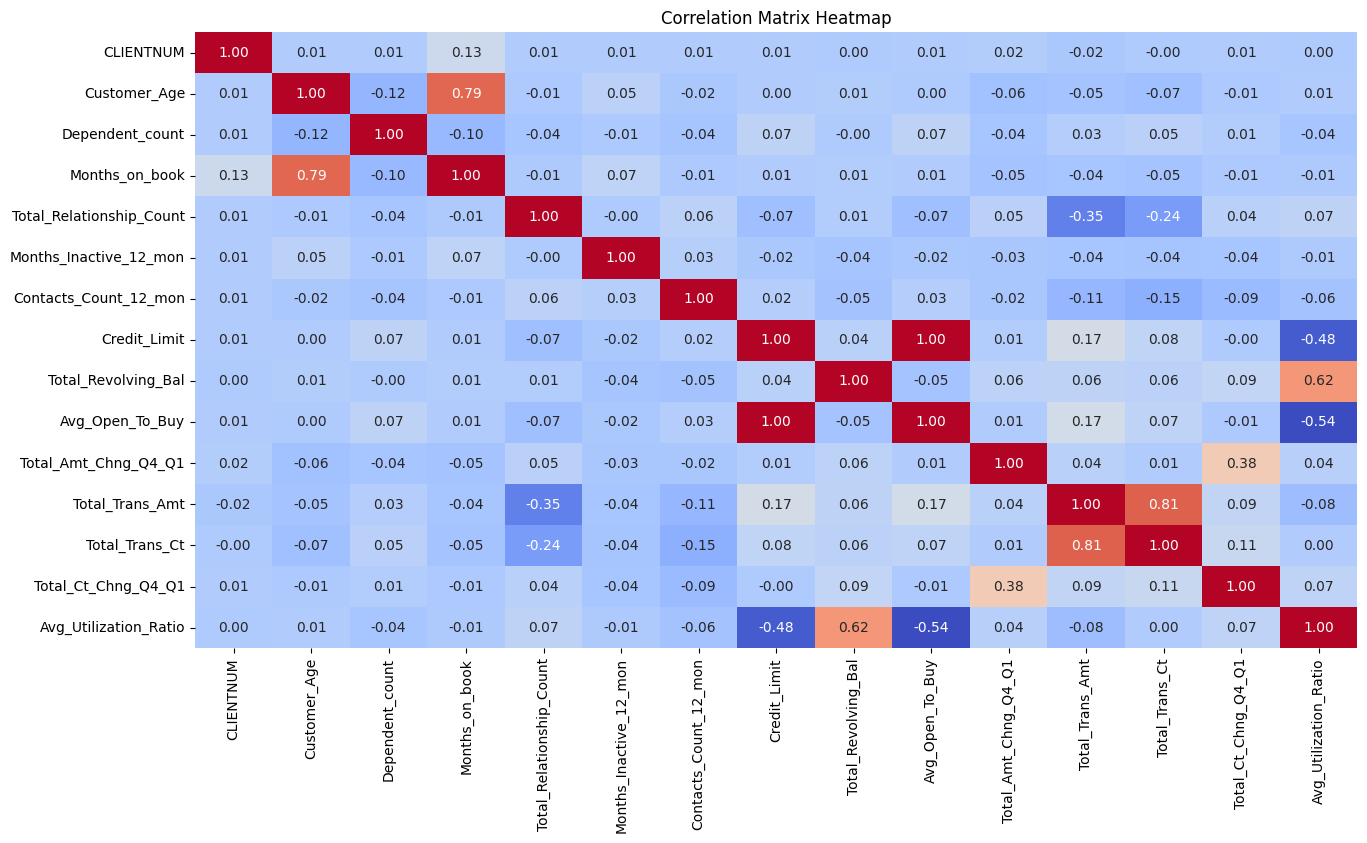

In [38]:
# Correlation matrix heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f",cbar=False)
plt.title("Correlation Matrix Heatmap")
plt.show()


#### Observation :
There is strong positive correlation between the credit limit and avg_open_to buy followed by total trans count and total transaction amount and months on book and customer age

<Figure size 1500x1000 with 0 Axes>

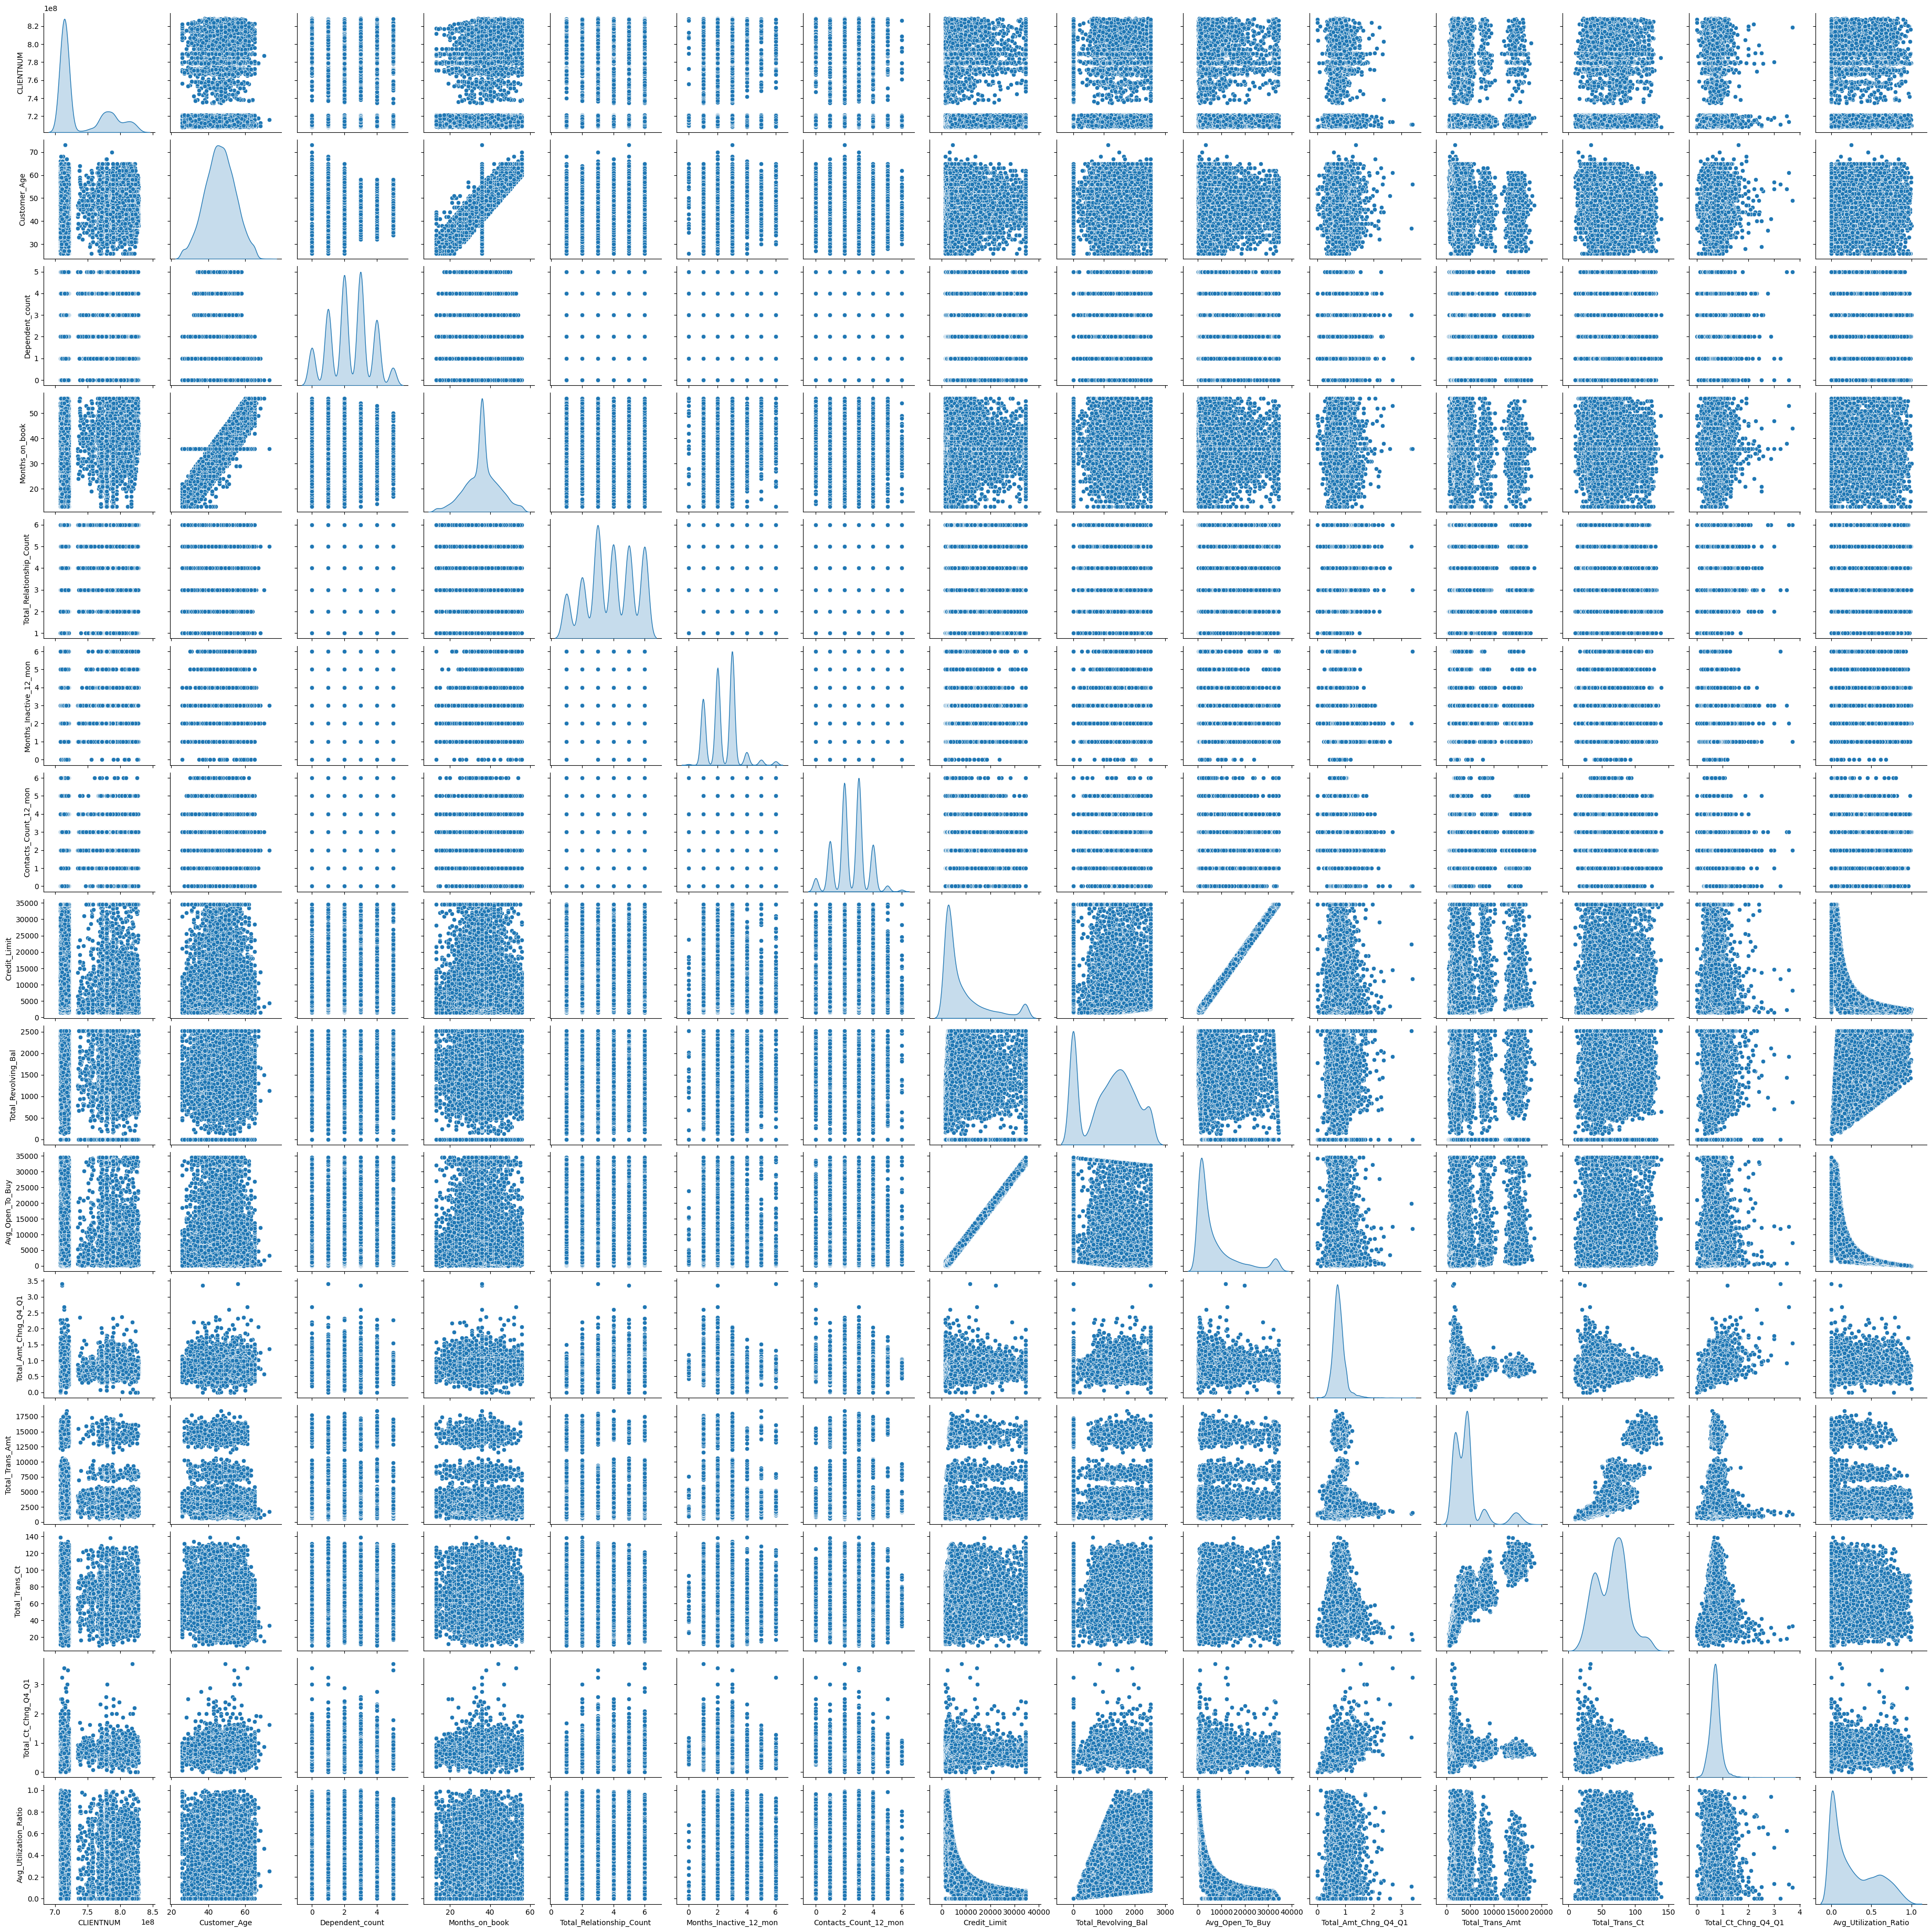

In [39]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15,10))
sns.pairplot(data[num_cols],diag_kind="kde")
plt.show()

#### Observation :
There is strong positive correlation between the credit limit and avg_open_to buy followed by total trans count and total transaction amount and months on book and customer age

## Data preprocessing

In [40]:
#copy of the data
data1=data.copy()

In [41]:
data1.drop(columns="CLIENTNUM",inplace=True)

#### Observation :
Dropping the clientnum column as all the customers are unique

### Outlier check

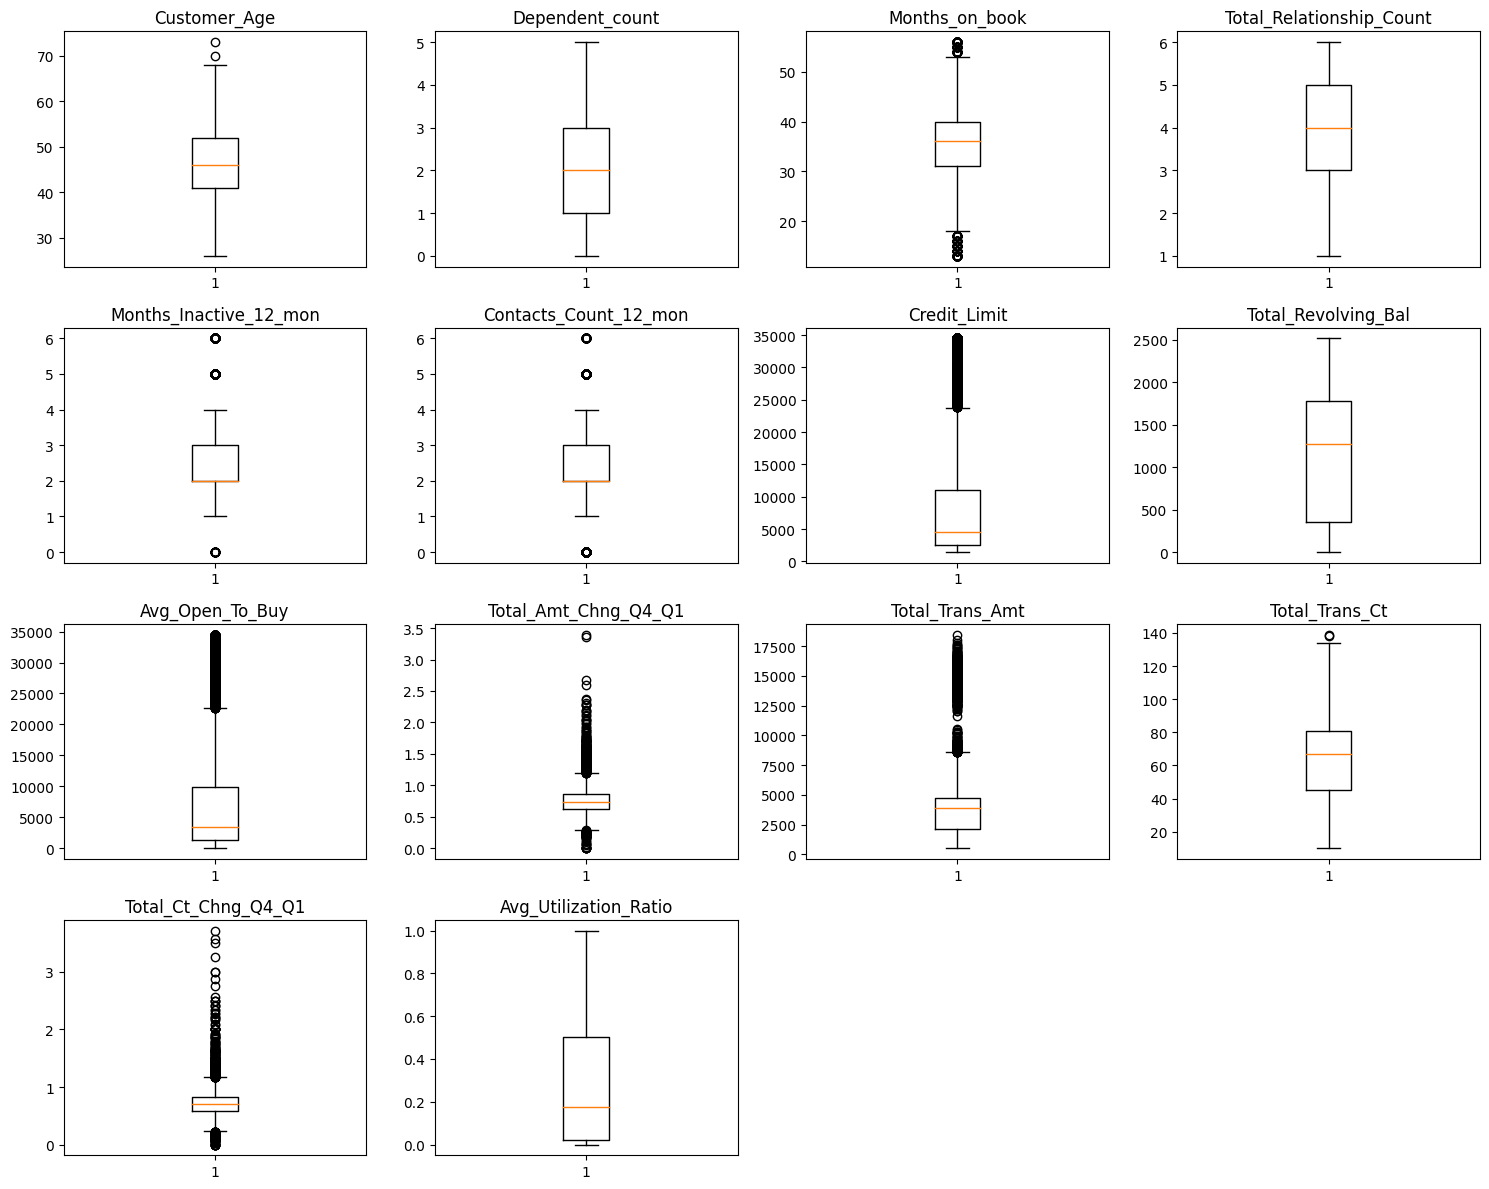

In [42]:
# outlier detection using boxplot
numeric_columns = data1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation :
There are some outliers in many columns but not handling them as they are real values

### Feature Engineering

In [43]:
# Replace "Existing Customer" with 0 and "Attrited Customer" with 1 in the 'Attrition_Flag' column
data1['Attrition_Flag'] = data['Attrition_Flag'].replace({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

# Checking the changes
data1['Attrition_Flag'].value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

#### Observation :
Replacing the existing customer as 0 and attrited customers as 1 in the target column

In [44]:
#separating the dependent and independent variables
X=data1.drop(columns="Attrition_Flag")
Y=data1["Attrition_Flag"]


In [45]:
#splitting the data into 3 parts(train,validation,test)
X_temp, X_test, y_temp, y_test = train_test_split( X, Y, test_size=0.2, random_state=1, stratify=Y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


### Missing values

In [46]:
print("Missing values before imputation:")
print(X_train.isnull().sum())  # Check train set
print(X_val.isnull().sum())    # Check validation set
print(X_test.isnull().sum())   # Check test set

Missing values before imputation:
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level             928
Marital_Status              457
Income_Category               0
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level             294
Marital_Status              140
Income_Category               0
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon    

In [47]:
#handling the missing values
imputer = SimpleImputer(strategy='most_frequent')

# Fitting and transforming the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transforming the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transforming the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [48]:
print("Missing values after imputation:")
print(X_train.isnull().sum())  
print(X_val.isnull().sum())    
print(X_test.isnull().sum())   


Missing values after imputation:
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal     

#### Observation :
Handling the missing values in train,validation, test data by using simple imputer with same function to avoid data leakage

### Scaling the data

In [49]:
#scaling the data

numerical_features = [
    "Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count", 
    "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", 
    "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", 
    "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"
]


scaler = StandardScaler()

# Fitting and transforming the data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


#### Observation :
scaling the numerical data in train,test and validation data using standard scaler

### Encoding

In [50]:
categorical_features_train = [col for col in X_train.columns if X_train[col].dtype == "object"]
categorical_features_val = [col for col in X_val.columns if X_val[col].dtype == "object"]
categorical_features_test = [col for col in X_test.columns if X_test[col].dtype == "object"]

print("Categorical Features (Train):", categorical_features_train)
print("Categorical Features (Val):", categorical_features_val)
print("Categorical Features (Test):", categorical_features_test)

#converting the categorical data into numerical data by using one hot encoding

X_train_encoded = pd.get_dummies(X_train, columns=categorical_features_train, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_features_val, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features_test, drop_first=True)


Categorical Features (Train): ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Categorical Features (Val): ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Categorical Features (Test): ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


#### Observation :
Encoding the categorical data into numerical data by using one hot encoding

In [51]:
X_train_encoded.shape

(6075, 30)

In [52]:
y_train.shape

(6075,)

In [53]:
print(X_train_encoded.shape)
print(X_val_encoded.shape)
print(X_test_encoded.shape)

(6075, 30)
(2026, 30)
(2026, 30)


## Model Building -- Original Data

In [55]:
%%time 

# Initialize models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("dtree", DecisionTreeClassifier(random_state=1))
]

# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Metrics dictionary to store results
metrics = {
    "Precision": "precision",
    "Recall": "recall",
    "F1 Score": "f1"
}

# Store cross-validation results
print("\nCross-Validation Performance on Training Dataset:\n")
cv_results = {metric: [] for metric in metrics.keys()} 

for name, model in models:
    print(f"Model: {name}")
    for metric_name, metric_scoring in metrics.items():
        cv_result = cross_val_score(model, X_train_encoded, y_train, scoring=metric_scoring, cv=kfold)
        cv_results[metric_name].append(cv_result.mean())
        print(f"{metric_name}: {cv_result.mean():.4f}")
    print("-" * 50)

# Validation performance
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_encoded, y_train)  # Train model
    y_pred = model.predict(X_val_encoded)  # Predict on validation set

    print(f"Model: {name}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
    print("-" * 50)



Cross-Validation Performance on Training Dataset:

Model: Bagging
Precision: 0.8801
Recall: 0.7787
F1 Score: 0.8256
--------------------------------------------------
Model: Random forest
Precision: 0.9165
Recall: 0.7520
F1 Score: 0.8258
--------------------------------------------------
Model: GBM
Precision: 0.9298
Recall: 0.8135
F1 Score: 0.8676
--------------------------------------------------
Model: Adaboost
Precision: 0.8667
Recall: 0.8217
F1 Score: 0.8433
--------------------------------------------------
Model: dtree
Precision: 0.7834
Recall: 0.7889
F1 Score: 0.7856
--------------------------------------------------

Validation Performance:

Model: Bagging
Precision: 0.8949
Recall: 0.8098
F1 Score: 0.8502
--------------------------------------------------
Model: Random forest
Precision: 0.9233
Recall: 0.8129
F1 Score: 0.8646
--------------------------------------------------
Model: GBM
Precision: 0.9365
Recall: 0.8589
F1 Score: 0.8960
------------------------------------------

In [56]:
# Original data Test performance
print("\nTest Performance:\n")
test_results = []

for name, model in models:
    y_pred = model.predict(X_test_encoded)  # Predict on test set

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    test_results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert test results to DataFrame for better readability
test_results_df = pd.DataFrame(test_results)
print(test_results_df)



Test Performance:

           Model  Precision    Recall  F1 Score
0        Bagging   0.861027  0.876923  0.868902
1  Random forest   0.925532  0.803077  0.859967
2            GBM   0.929032  0.886154  0.907087
3       Adaboost   0.903125  0.889231  0.896124
4          dtree   0.774286  0.833846  0.802963


#### Observation :
1. Gradient Boosting Machine (GBM): This model consistently achieved the highest F1 score across training, validation, and test data,which indicates a good tradeoff between precision and recall.

2. AdaBoost: AdaBoost has a strong performance with high precision and recall, making a possible choice
3. Random Forest and Bagging Classifiers: These models showed good precision but had slightly lower recall and F1 scores,   which suggests that they may miss some positive instances.

4. Decision Tree: This model has the lowest performance among the evaluated models, indicating it may not be a good model for this data

## Model Building --Oversampled Data

In [57]:
%%time 
# Upsampling the minority class using SMOTE
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)  


# aDefining the models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1))
]

# Set up cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Defining evaluation metrics
metrics = {
    "Precision": "precision",
    "Recall": "recall",
    "F1 Score": "f1"
}

# Evaluating models using cross-validation
cv_results = {metric: [] for metric in metrics.keys()}  # Store CV scores for each metric

print("Cross-Validation Performance on Resampled Training Data:\n")
for name, model in models:
    print(f"Model: {name}")
    for metric_name, metric_scoring in metrics.items():
        cv_result = cross_val_score(model, X_train_resampled, y_train_resampled, scoring=metric_scoring, cv=kfold)
        cv_results[metric_name].append(cv_result.mean())
        print(f"{metric_name}: {cv_result.mean():.4f}")
    print("-" * 50)

# Training models and evaluating on validation data
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)  # Train model on resampled data
    y_pred = model.predict(X_val_encoded)  # Predict on validation set

    print(f"Model: {name}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
    print("-" * 50)


Cross-Validation Performance on Resampled Training Data:

Model: Bagging
Precision: 0.9605
Recall: 0.9598
F1 Score: 0.9602
--------------------------------------------------
Model: Random forest
Precision: 0.9716
Recall: 0.9800
F1 Score: 0.9758
--------------------------------------------------
Model: GBM
Precision: 0.9652
Recall: 0.9729
F1 Score: 0.9690
--------------------------------------------------
Model: Adaboost
Precision: 0.9486
Recall: 0.9625
F1 Score: 0.9555
--------------------------------------------------
Model: Decision Tree
Precision: 0.9388
Recall: 0.9484
F1 Score: 0.9435
--------------------------------------------------

Validation Performance:

Model: Bagging
Precision: 0.8029
Recall: 0.8374
F1 Score: 0.8198
--------------------------------------------------
Model: Random forest
Precision: 0.8585
Recall: 0.8558
F1 Score: 0.8571
--------------------------------------------------
Model: GBM
Precision: 0.8442
Recall: 0.9141
F1 Score: 0.8778
----------------------------

In [58]:
# Test performance
print("\nTest Performance:\n")
test_results = []

for name, model in models:
    y_pred = model.predict(X_test_encoded)  # Predict on test set

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    test_results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert test results to DataFrame for better readability
test_results_df = pd.DataFrame(test_results)
print(test_results_df)



Test Performance:

           Model  Precision    Recall  F1 Score
0        Bagging   0.808333  0.895385  0.849635
1  Random forest   0.870871  0.892308  0.881459
2            GBM   0.838889  0.929231  0.881752
3       Adaboost   0.771795  0.926154  0.841958
4  Decision Tree   0.717742  0.821538  0.766141


#### Observation :
1. Bagging Classifier : It has Slightly lower test F1 Score of 0.8496, which indicates that oversampling did not improve its performance
2. Random Forest : the model has improved test F1 Score of 0.8815,which suggests that oversampling has increased the perfromance of this model.
3. GBM : It has Slight decrease in test F1 Score to 0.8818, which suggests  that oversampling did not improve its performance
4. Adaboost : It has Lower test F1 Score of 0.8419, which suggests  that oversampling did not improve its performance
5. Decision trees : It has Slight improvement in test F1 Score to 0.7661, which suggests that oversampling has increased the perfromance of this model.

## Model Building -- Undersampled data

In [59]:
%%time

# Downsampling the majority class using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=1)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_encoded, y_train)

# Defining the models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1))
]

# Set up cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Defining evaluation metrics
metrics = {
    "Precision": "precision",
    "Recall": "recall",
    "F1 Score": "f1"
}

# Evaluating models using cross-validation
cv_results = {metric: [] for metric in metrics.keys()}  # Store CV scores for each metric

print("Cross-Validation Performance on Downsampled Training Data:\n")
for name, model in models:
    print(f"Model: {name}")
    for metric_name, metric_scoring in metrics.items():
        cv_result = cross_val_score(model, X_train_resampled, y_train_resampled, scoring=metric_scoring, cv=kfold)
        cv_results[metric_name].append(cv_result.mean())
        print(f"{metric_name}: {cv_result.mean():.4f}")
    print("-" * 50)

# Training models and evaluating on validation data
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)  # Train model on resampled data
    y_pred = model.predict(X_val_encoded)  # Predict on encoded validation set

    print(f"Model: {name}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
    print("-" * 50)


Cross-Validation Performance on Downsampled Training Data:

Model: Bagging
Precision: 0.9231
Recall: 0.9088
F1 Score: 0.9157
--------------------------------------------------
Model: Random forest
Precision: 0.9264
Recall: 0.9386
F1 Score: 0.9323
--------------------------------------------------
Model: GBM
Precision: 0.9266
Recall: 0.9406
F1 Score: 0.9334
--------------------------------------------------
Model: Adaboost
Precision: 0.9191
Recall: 0.9314
F1 Score: 0.9250
--------------------------------------------------
Model: Decision Tree
Precision: 0.8897
Recall: 0.8924
F1 Score: 0.8910
--------------------------------------------------

Validation Performance:

Model: Bagging
Precision: 0.6835
Recall: 0.9141
F1 Score: 0.7822
--------------------------------------------------
Model: Random forest
Precision: 0.7173
Recall: 0.9264
F1 Score: 0.8086
--------------------------------------------------
Model: GBM
Precision: 0.7358
Recall: 0.9571
F1 Score: 0.8320
--------------------------

In [60]:

# Test performance for 
print("\nTest Performance on Downsampled Models:\n")
test_results = []

for name, model in models:
    # Predict on the test set
    y_test_pred = model.predict(X_test_encoded)

    # Calculate metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Append results as a dictionary
    test_results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert list of dicts to a DataFrame for a tabular view
test_results_df = pd.DataFrame(test_results)
print(test_results_df)



Test Performance on Downsampled Models:

           Model  Precision    Recall  F1 Score
0        Bagging   0.662366  0.947692  0.779747
1  Random forest   0.712963  0.947692  0.813738
2            GBM   0.719178  0.969231  0.825688
3       Adaboost   0.702703  0.960000  0.811443
4  Decision Tree   0.596457  0.932308  0.727491


#### Observation :
1. GBM : It has a slight decrease, with an F1 Score of 0.8320 on validation and 0.8257 on the test set.
2. Random forest : The performance has decreased with an F1 Score of 0.8086 on validation and 0.8137 on the test set. 
3. Bagging classifier : performance has slightly decreased with an F1 Score of 0.8086 on validation and 0.8137 on the test set 
4. Adaboost :  performance has slightly decreased with an F1 Score of 0.8130 on validation and 0.8114 on the test set. 
5. Decision tree : performance has slightly decreased with an achieving an F1 Score of 0.7273 on validation and 0.7275 on the test set.

## Model performance improvement using hyperparameter tuning

In [61]:
%%time 

# Defining hyperparameter grids
param_grids = {
    "RandomForest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "GradientBoosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 10],
        "subsample": [0.7, 0.8, 1.0],
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.05, 0.1, 1.0],
    }
}

# building the model with 3 different classifiers
models = {
    "RandomForest": RandomForestClassifier(random_state=1),
    "GradientBoosting": GradientBoostingClassifier(random_state=1),
    "AdaBoost": AdaBoostClassifier(random_state=1),
}

best_models = {}
results = []


# Performing hyperparameter tuning
for name, model in models.items():
    print(f"Tuning {name}...\n")
    random_search = RandomizedSearchCV(model, param_distributions=param_grids[name], 
                                       n_iter=10, scoring="f1", cv=3, 
                                       random_state=1, n_jobs=-1)
    random_search.fit(X_train_resampled, y_train_resampled)
    best_models[name] = random_search.best_estimator_
    
    print(f"Best Parameters for {name}: {random_search.best_params_}\n")
    print("-" * 50)

# Evaluate best models on validation data
print("\nValidation Performance of Best Models:\n")
for name, model in best_models.items():
    y_pred = model.predict(X_val_encoded)

    print(f"Model: {name}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
    print("-" * 50)
    

Tuning RandomForest...

Best Parameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}

--------------------------------------------------
Tuning GradientBoosting...

Best Parameters for GradientBoosting: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

--------------------------------------------------
Tuning AdaBoost...

Best Parameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 1.0}

--------------------------------------------------

Validation Performance of Best Models:

Model: RandomForest
Precision: 0.6989
Recall: 0.9325
F1 Score: 0.7989
--------------------------------------------------
Model: GradientBoosting
Precision: 0.7566
Recall: 0.9724
F1 Score: 0.8510
--------------------------------------------------
Model: AdaBoost
Precision: 0.7062
Recall: 0.9509
F1 Score: 0.8105
--------------------------------------------------
CPU times: total: 3.33 s
Wall time: 38.1 s


In [64]:
# Test performance for model performance using hyperparameter tuning
# Test performance for model performance using hyperparameter tuning
print("\nTest Performance:\n")
test_results = []

for name, model in best_models.items():  # Iterate over the best_models dictionary
    # Predict on the test set
    y_test_pred = model.predict(X_test_encoded)

    # Calculate metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Append results as a dictionary
    test_results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert list of dicts to a DataFrame for a tabular view
test_results_df = pd.DataFrame(test_results)
print(test_results_df)




Test Performance:

              Model  Precision    Recall  F1 Score
0      RandomForest   0.689579  0.956923  0.801546
1  GradientBoosting   0.756563  0.975385  0.852151
2          AdaBoost   0.723898  0.960000  0.825397


#### Observation :


1. Gradient Boosting: Achieved the highest F1 Score of 0.8510 on the validation set, indicating a strong balance between precision and recall.
2. Random Forest: Showed a slightly lower F1 Score of 0.7989, with a precision of 0.6989 and recall of 0.9325, suggesting high sensitivity but more false positives.

3. AdaBoost: Recorded an F1 Score of 0.8105, with precision at 0.7062 and recall at 0.9509, performing better than Random Forest but not as well as Gradient Boosting.

### Final model selection

1. Based on the validation and test performance metrics, the Gradient Boosting Model (GBM) with tuned hyperparameters has good performance
2. On the test set, GBM achieved a precision of 0.7566 and a recall of 0.9754, resulting in an F1 Score of 0.8510. This indicates the model's strong ability to correctly identify positive instances while minimizing false positives.

### Business Insights and Recommendations

1. Not all customers are equally likely to churn. High-value customers, those who frequently use their credit cards or carry large balances, are often more profitable but may also have a higher churn risk.
2. Use predictive modeling to segment customers based on their likelihood to churn. Create targeted retention strategies for each segment, offering tailored benefits or rewards for those at the highest risk.
3. Poor customer service experiences and dissatisfaction with credit limits or fees are often key drivers of churn.
4. Customers dissatisfied with their credit limits, either feeling they are too low or too high, may consider switching to competitors offering more favorable terms.
5. Many credit card customers seek value through rewards, whether via cashback, points, or travel perks. If competitors offer better rewards, customers are more likely to switch.
6. Regularly assess and adjust credit limits based on customer spending patterns, payment history, and credit scores.